date: 03/25/2020

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 10 - Cluster Analysis

**Clustering** is an example of **unsupervised learning**, in which we work with completely unlabeled data (we have the features $X$, but we do not have tha labels $y$). 
Clustering attemps to group objects together based on similarity (or distance).

We will cover three clustering algorithms:

    10.1 k-means clustering

    10.2 hierarchical clustering

    10.3 spectral clustering

The objective of clustering is to identify distinct groups in a dataset such that the observations within a group are similar to each other but different from observations in other groups.

## 10.1 k-means clustering

   10.1.1 k-means step by step
   
   10.1.2 k-means implementation
   
   10.1.3 choosing k
   
   10.1.4 example
   
   10.1.5 some questions/problems

### 10.1.1 k-means algorithm step by step

Consider the following unlabeled dataset:

Text(0.5, 1.0, 'Four-blobs Dataset')

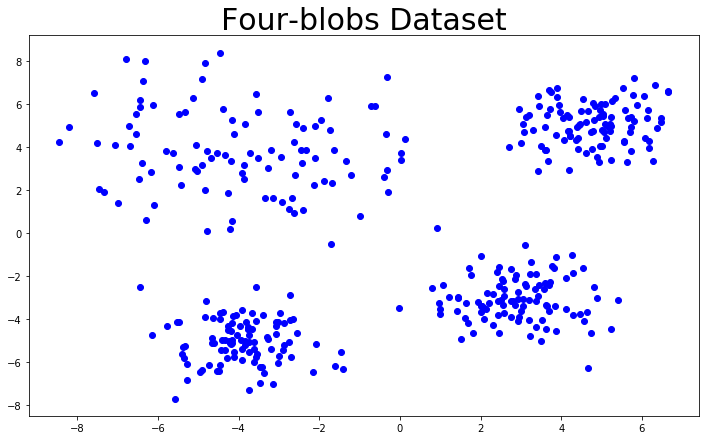

In [2]:
'four-blobs dataset'
X = np.zeros((400,2)) #2 features; 400 data points
X[0:100] = 2*np.random.randn(100,2) + [-4,4] # blob 1
X[100:200] = np.random.randn(100,2) + [3,-3] # blob 2
X[200:300] = np.random.randn(100,2) + [5,5] # blob 3
X[300:400] = np.random.randn(100,2) + [-4,-5]

'plot dataset'
plt.figure(figsize=(12,7))
plt.plot(X[:,0],X[:,1],'bo')
plt.title('Four-blobs Dataset',fontsize=30)

We can clearly see four blobs (clusters). 
The **k-means** algorithm is a simple algorithm capable of clustering this kind of dataset very quickly.

Let's train a k-means cluster on this data set.

First, we have to specify the number of clusters $k$ that the algorithm must find. 
In this example, it is pretty obvious from looking at the data that $k$ should be set to 4. 
In general, choosing $k$ is not that easy.
We will discuss this shortly.

In [3]:
'number of clusters'
k = 4

To initialize the algorithm, we randomly assign a cluster to each observation

In [4]:
clusters = np.array([np.random.randint(k) for i in range(len(X))]) # random assignment

In [5]:
clusters

array([3, 1, 2, 0, 2, 2, 3, 0, 1, 2, 3, 3, 1, 1, 3, 3, 3, 0, 2, 1, 0, 3,
       3, 2, 3, 0, 3, 3, 1, 3, 1, 3, 2, 1, 2, 3, 2, 1, 1, 2, 3, 1, 3, 3,
       2, 3, 1, 2, 3, 3, 1, 0, 2, 2, 3, 2, 3, 2, 0, 1, 1, 1, 3, 0, 3, 3,
       3, 0, 0, 1, 1, 3, 0, 1, 1, 1, 0, 3, 0, 2, 2, 0, 3, 3, 0, 1, 1, 1,
       2, 2, 2, 2, 2, 3, 3, 3, 2, 0, 2, 2, 2, 2, 2, 1, 0, 1, 3, 0, 0, 0,
       1, 1, 2, 0, 0, 0, 0, 1, 0, 3, 0, 1, 2, 1, 3, 2, 0, 0, 3, 1, 1, 0,
       2, 1, 1, 1, 0, 1, 2, 0, 0, 3, 2, 2, 2, 1, 0, 1, 1, 1, 1, 1, 3, 2,
       2, 2, 0, 1, 2, 1, 1, 0, 2, 2, 3, 3, 3, 2, 3, 2, 3, 2, 3, 2, 2, 3,
       3, 2, 1, 1, 0, 2, 1, 1, 1, 2, 3, 1, 2, 2, 1, 3, 3, 0, 2, 0, 2, 3,
       3, 1, 0, 3, 2, 0, 3, 2, 2, 3, 3, 1, 1, 0, 2, 3, 0, 2, 2, 0, 0, 3,
       2, 3, 0, 2, 1, 1, 1, 1, 2, 1, 0, 3, 0, 3, 1, 2, 1, 0, 3, 1, 2, 2,
       0, 1, 2, 1, 3, 2, 1, 0, 3, 0, 0, 1, 3, 1, 3, 3, 3, 3, 0, 3, 2, 1,
       0, 1, 1, 2, 2, 3, 1, 2, 2, 3, 0, 0, 2, 3, 1, 2, 0, 2, 3, 3, 0, 3,
       2, 1, 3, 3, 2, 1, 3, 1, 3, 2, 1, 2, 1, 0, 0,

Text(0.5, 1.0, 'Random initialization')

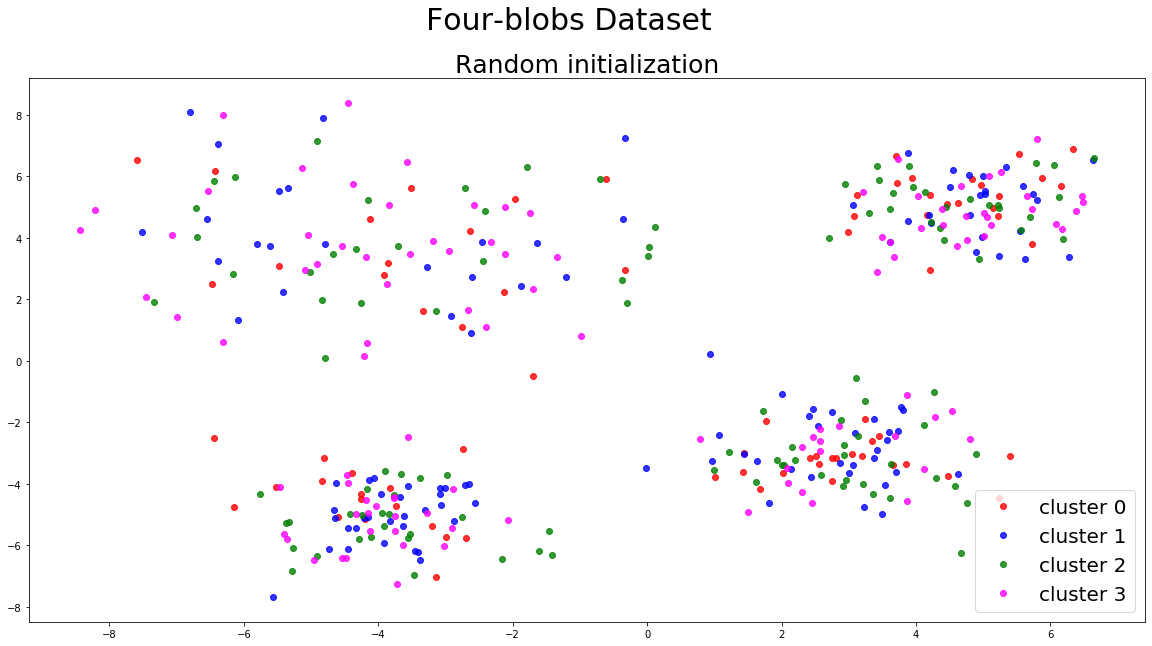

In [6]:
colors = ['red','blue','green','magenta']
plt.figure(figsize=(20,10))
for i in range(k):
    'plot dataset points'
    plt.plot(X[clusters==i,0],X[clusters==i,1],'o',color=colors[i],label = 'cluster '+str(i),alpha=0.8)
    plt.legend(fontsize=20, loc='lower right')
plt.suptitle('Four-blobs Dataset',fontsize=30)
plt.title('Random initialization',fontsize=25)

The k-means algorithm iteratively proceeds as follows:

    step 1: compute the cluster centers (cluster means) 
    
    step 2: assign each point to the center (mean) to which it is closest 
    
Repeat steps 1 and 2 until the means stop moving.

In [7]:
'step 1: update centers'
means = np.zeros((k,2))
for i in range(k):
    if len(X[clusters==i])!=0:
        means[i] = np.mean(X[clusters==i],axis=0)
    else: # if any of the cluster centers has no data points associated with it, replace it with a random data point
        idx = np.random.randint(k)
        means[i] = X[idx]

In [611]:
means

array([[-0.09244644,  0.12366214],
       [ 0.38782243, -0.02829778],
       [-0.04173623,  0.55691099],
       [ 0.18332102,  0.2783277 ]])

Text(0.5, 1.0, 'Four-blobs Dataset')

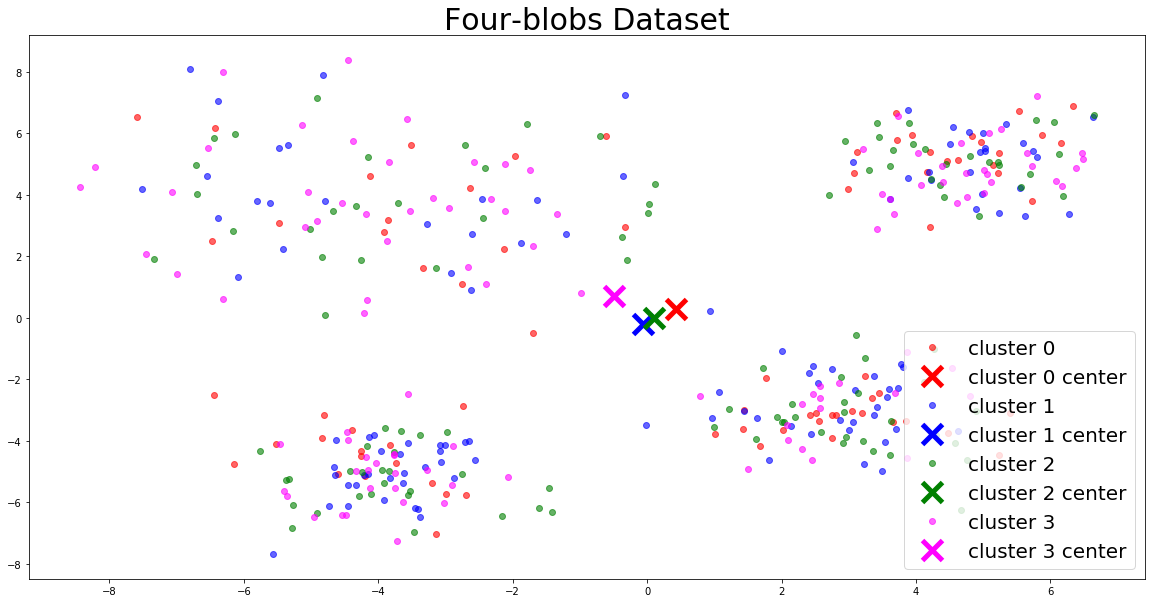

In [8]:
colors = ['red','blue','green','magenta']
plt.figure(figsize=(20,10))
for i in range(k):
    'plot dataset points'
    plt.plot(X[clusters==i,0],X[clusters==i,1],'o',color=colors[i],label = 'cluster '+str(i),alpha=0.6)
    'plot cluster centers'
    plt.plot(means[i][0],means[i][1],'x',color = colors[i],markersize=20,markeredgewidth=5, label = 'cluster '+str(i)+' center')
    plt.legend(fontsize=20, loc='lower right')
plt.title('Four-blobs Dataset',fontsize=30)

In [9]:
'step 2: update clusters'
clusters = np.argmin(np.array([np.linalg.norm(X-means[i],axis=1) for i in range(k)]),axis=0)

Text(0.5, 1.0, 'Four-blobs Dataset')

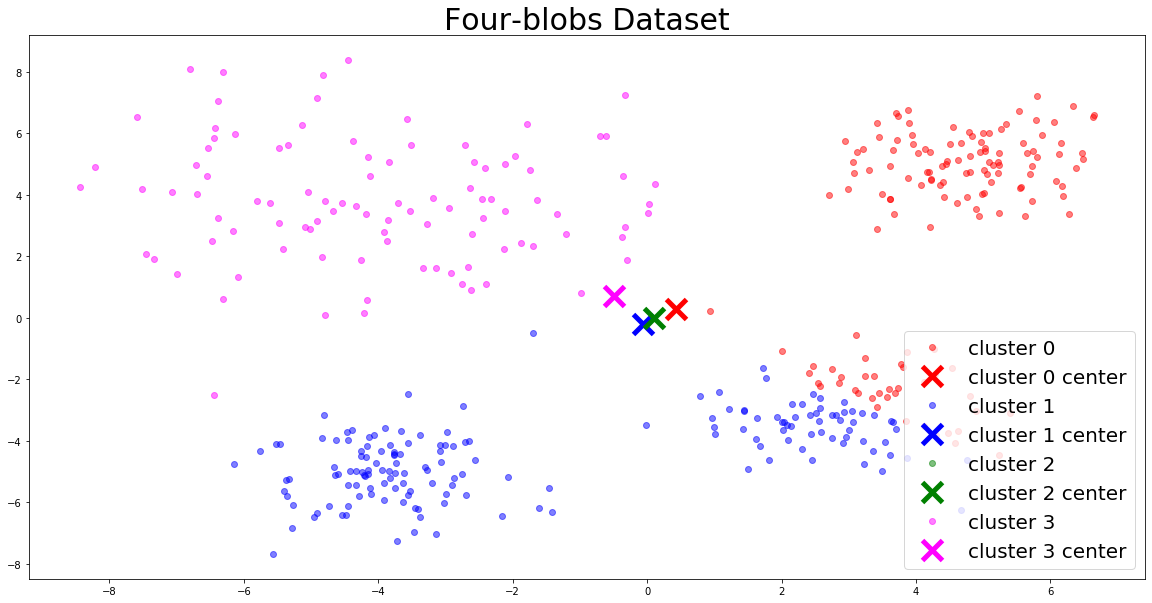

In [10]:
colors = ['red','blue','green','magenta','yellow']
plt.figure(figsize=(20,10))
for i in range(k):
    'plot dataset points'
    plt.plot(X[clusters==i,0],X[clusters==i,1],'o',color=colors[i],label = 'cluster '+str(i),alpha=0.5)
    'plot cluster centers'
    plt.plot(means[i][0],means[i][1],'x',color = colors[i],markersize=20,markeredgewidth=5, label = 'cluster '+str(i)+' center')
    plt.legend(fontsize=20,loc='lower right')
plt.title('Four-blobs Dataset',fontsize=30)

In [11]:
'Repeat steps 1 and 2'

'step 1: update centers'
for i in range(k):
    if len(X[clusters==i])!=0:
        means[i] = np.mean(X[clusters==i],axis=0)
    else: # if any of the cluster centers has no data points associated with it, replace it with a random data point
        idx = np.random.randint(k)
        means[i] = X[idx]

'step 2: update clusters'
clusters = np.argmin(np.array([np.linalg.norm(X-means[i],axis=1) for i in range(k)]),axis=0)

Text(0.5, 1.0, 'Four-blobs Dataset')

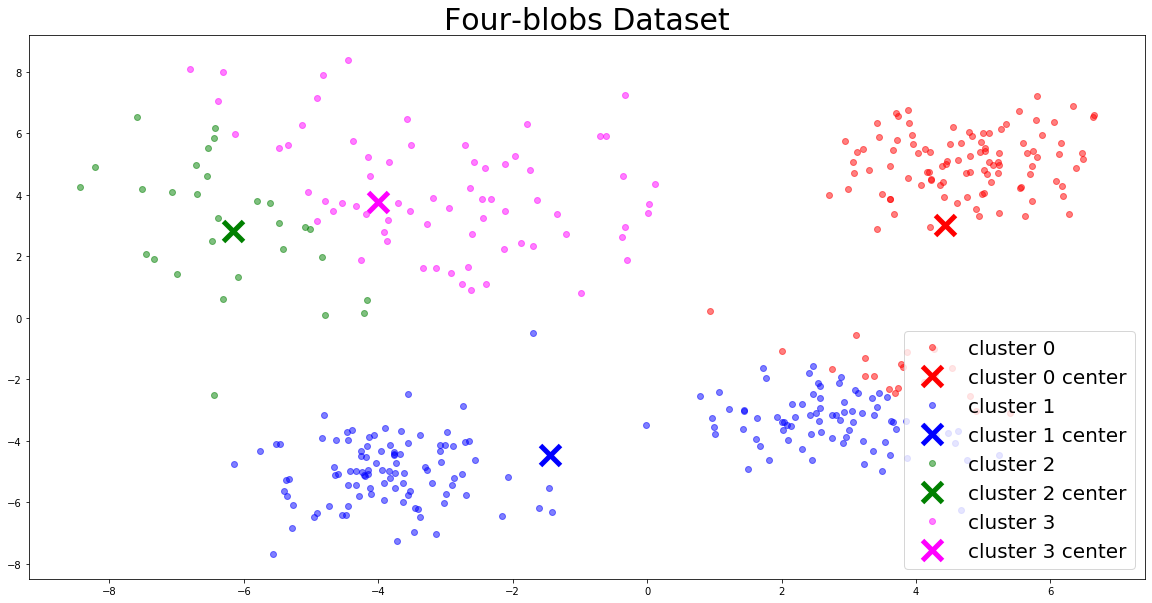

In [12]:
colors = ['red','blue','green','magenta','yellow']
plt.figure(figsize=(20,10))
for i in range(k):
    'plot dataset points'
    plt.plot(X[clusters==i,0],X[clusters==i,1],'o',color=colors[i],label = 'cluster '+str(i),alpha=0.5)
    'plot cluster centers'
    plt.plot(means[i][0],means[i][1],'x',color = colors[i],markersize=20,markeredgewidth=5, label = 'cluster '+str(i)+' center')
    plt.legend(fontsize=20,loc='lower right')
plt.title('Four-blobs Dataset',fontsize=30)

In [13]:
'Repeat steps 1 and 2'

'step 1: update centers'
for i in range(k):
    if len(X[clusters==i])!=0:
        means[i] = np.mean(X[clusters==i],axis=0)
    else: # if any of the cluster centers has no data points associated with it, replace it with a random data point
        idx = np.random.randint(k)
        means[i] = X[idx]

'step 2: update clusters'
clusters = np.argmin(np.array([np.linalg.norm(X-means[i],axis=1) for i in range(k)]),axis=0)

Text(0.5, 1.0, 'Four-blobs Dataset')

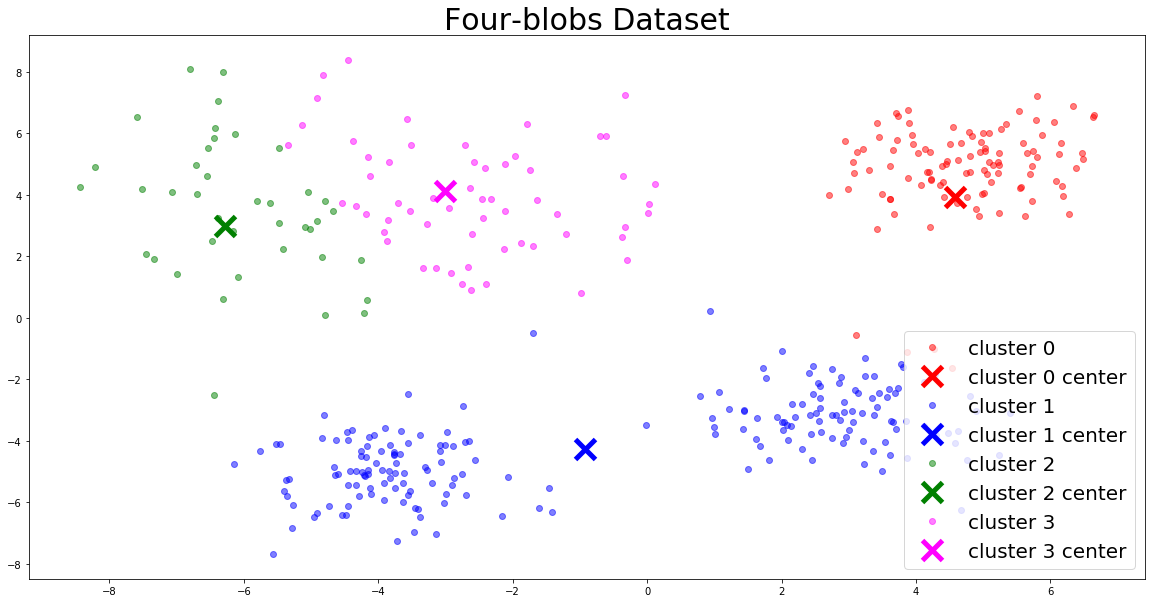

In [14]:
colors = ['red','blue','green','magenta']
plt.figure(figsize=(20,10))
for i in range(k):
    'plot dataset points'
    plt.plot(X[clusters==i,0],X[clusters==i,1],'o',color=colors[i],label = 'cluster '+str(i),alpha=0.5)
    'plot cluster centers'
    plt.plot(means[i][0],means[i][1],'x',color = colors[i],markersize=20,markeredgewidth=5, label = 'cluster '+str(i)+' center')
    plt.legend(fontsize=20,loc='lower right')
plt.title('Four-blobs Dataset',fontsize=30)

In [15]:
'Repeat steps 1 and 2'

'step 1: update centers'
for i in range(k):
    if len(X[clusters==i])!=0:
        means[i] = np.mean(X[clusters==i],axis=0)
    else: # if any of the cluster centers has no data points associated with it, replace it with a random data point
        idx = np.random.randint(k)
        means[i] = X[idx]

'step 2: update clusters'
clusters = np.argmin(np.array([np.linalg.norm(X-means[i],axis=1) for i in range(k)]),axis=0)

Text(0.5, 1.0, 'Four-blobs Dataset')

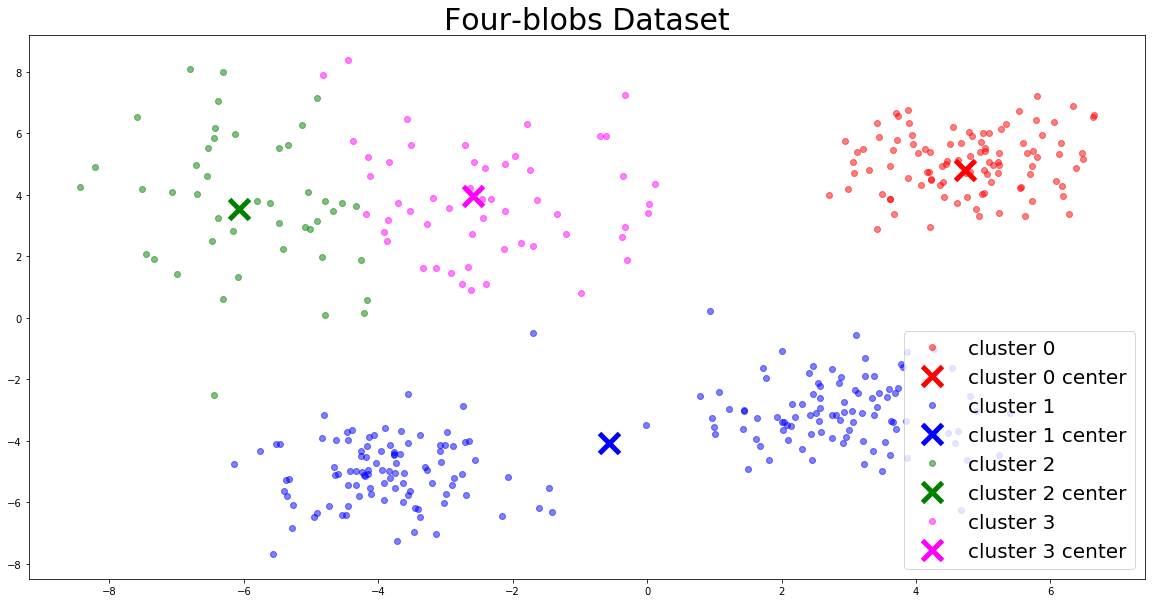

In [16]:
colors = ['red','blue','green','magenta']
plt.figure(figsize=(20,10))
for i in range(k):
    'plot dataset points'
    plt.plot(X[clusters==i,0],X[clusters==i,1],'o',color=colors[i],label = 'cluster '+str(i),alpha=0.5)
    'plot cluster centers'
    plt.plot(means[i][0],means[i][1],'x',color = colors[i],markersize=20,markeredgewidth=5, label = 'cluster '+str(i)+' center')
    plt.legend(fontsize=20,loc='lower right')
plt.title('Four-blobs Dataset',fontsize=30)

In [17]:
'Repeat steps 1 and 2'

'step 1: update centers'
for i in range(k):
    if len(X[clusters==i])!=0:
        means[i] = np.mean(X[clusters==i],axis=0)
    else: # if any of the cluster centers has no data points associated with it, replace it with a random data point
        idx = np.random.randint(k)
        means[i] = X[idx]

'step 2: update clusters'
clusters = np.argmin(np.array([np.linalg.norm(X-means[i],axis=1) for i in range(k)]),axis=0)

Text(0.5, 1.0, 'Four-blobs Dataset')

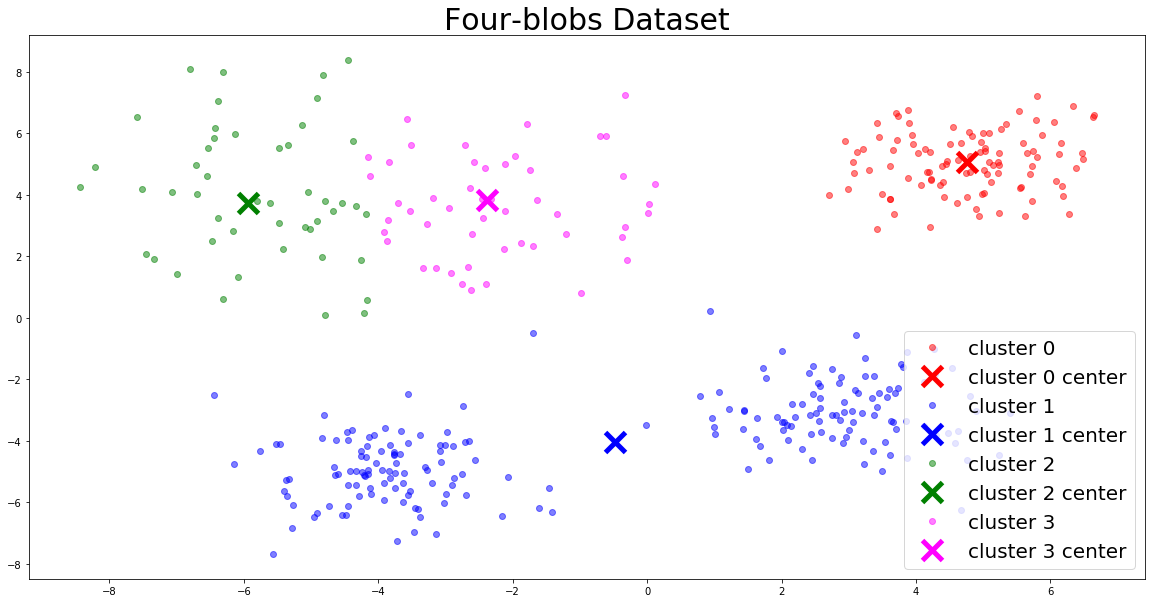

In [18]:
colors = ['red','blue','green','magenta']
plt.figure(figsize=(20,10))
for i in range(k):
    'plot dataset points'
    plt.plot(X[clusters==i,0],X[clusters==i,1],'o',color=colors[i],label = 'cluster '+str(i),alpha=0.5)
    'plot cluster centers'
    plt.plot(means[i][0],means[i][1],'x',color = colors[i],markersize=20,markeredgewidth=5, label = 'cluster '+str(i)+' center')
    plt.legend(fontsize=20,loc='lower right')
plt.title('Four-blobs Dataset',fontsize=30)

In [19]:
'Repeat steps 1 and 2'

'step 1: update centers'
for i in range(k):
    if len(X[clusters==i])!=0:
        means[i] = np.mean(X[clusters==i],axis=0)
    else: # if any of the cluster centers has no data points associated with it, replace it with a random data point
        idx = np.random.randint(k)
        means[i] = X[idx]

'step 2: update clusters'
clusters = np.argmin(np.array([np.linalg.norm(X-means[i],axis=1) for i in range(k)]),axis=0)

Text(0.5, 1.0, 'Four-blobs Dataset')

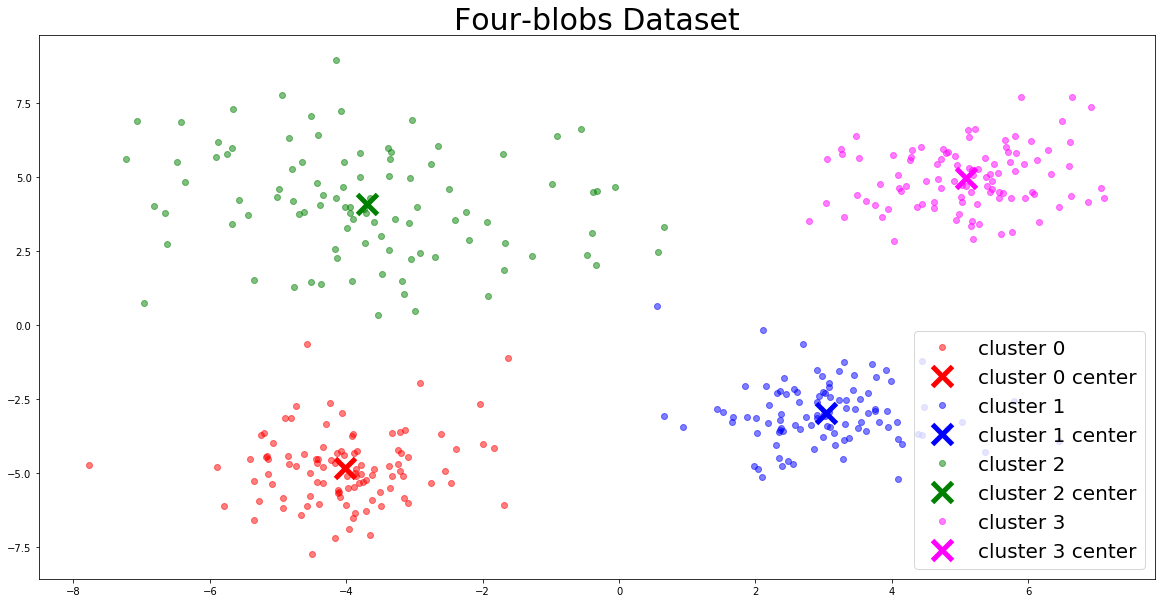

In [624]:
colors = ['red','blue','green','magenta']
plt.figure(figsize=(20,10))
for i in range(k):
    'plot dataset points'
    plt.plot(X[clusters==i,0],X[clusters==i,1],'o',color=colors[i],label = 'cluster '+str(i),alpha=0.5)
    'plot cluster centers'
    plt.plot(means[i][0],means[i][1],'x',color = colors[i],markersize=20,markeredgewidth=5, label = 'cluster '+str(i)+' center')
    plt.legend(fontsize=20,loc='lower right')
plt.title('Four-blobs Dataset',fontsize=30)

### 10.1.2 k-means implementation

In [20]:
def k_means(X,k,max_it=1000000):   
    it = 0 
    m,n = X.shape #dataset size, number of features
    repeat = True 
    'random initialization of clusters'
    clusters = np.random.randint(k,size=len(X)) # random assignment
    'means initialization'
    means = np.zeros((k,n))
    while repeat and it<=max_it: # repeat until clusters do not change or iterations > max_it
        it = it + 1
        'step 1: update means'
        for i in range(k):
            if len(X[clusters==i])!=0:
                means[i] = np.mean(X[clusters==i],axis=0)
            else: # if any of the cluster centers has no data points associated with it, replace it with a random data point
                idx = np.random.randint(m)
                means[i] = X[idx]
        'step 2: update clusters'
        new_clusters = np.argmin(np.array([np.linalg.norm(X-means[i],axis=1) for i in range(k)]),axis=0)        
        'check whether clusters and new_clusters are equal or not'
        if sum(clusters!=new_clusters)==0:
            repeat = False
        clusters = new_clusters
    return clusters, means

In [21]:
'test the k_means function'
k = 4
clusters, means = k_means(X,k)

Text(0.5, 1.0, 'Four-blobs Dataset')

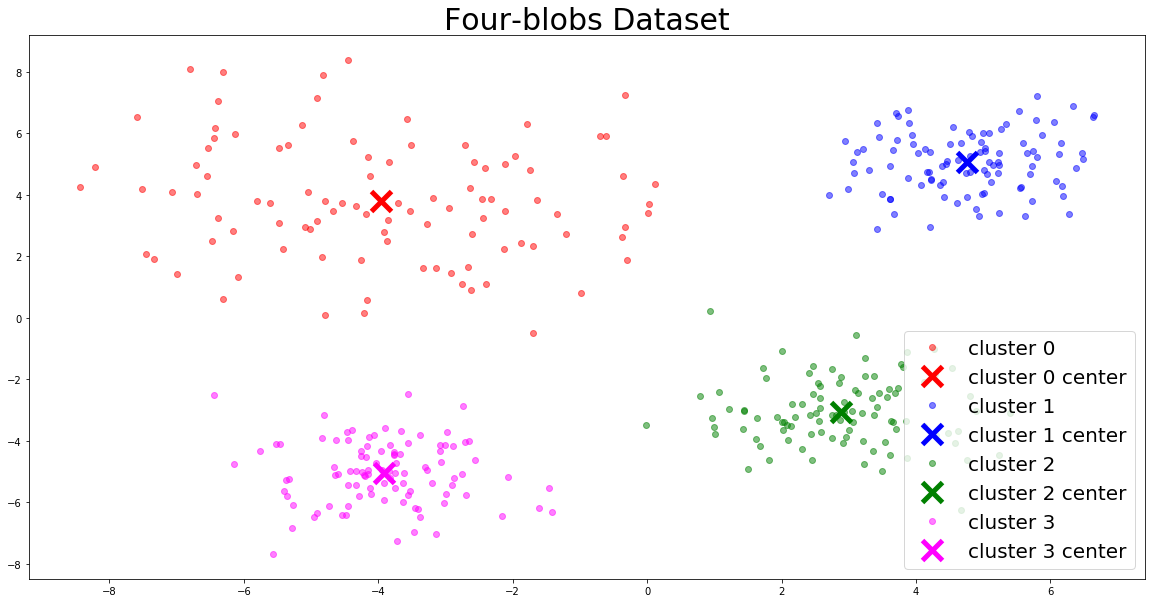

In [22]:
'plot dataset + cluster labels'
colors = ['red','blue','green','magenta']
plt.figure(figsize=(20,10))
for i in range(k):
    'plot dataset points'
    plt.plot(X[clusters==i,0],X[clusters==i,1],'o',color=colors[i],label = 'cluster '+str(i),alpha=0.5)
    'plot cluster means'
    plt.plot(means[i][0],means[i][1],'x',color = colors[i],markersize=20,markeredgewidth=5, label = 'cluster '+str(i)+' center')
    plt.legend(fontsize=20,loc='lower right')
plt.title('Four-blobs Dataset',fontsize=30)

### 10.1.3 Choosing the number of clusters k

So far, we have set the number of clusters $k$ to 4 because it was obvious by looking at the data that this was the correct number of clusters.
But in general, it will not be so easy to know how to set $k$, and the result might be quite bad if you set it to the wrong value.

As you can see below, setting k to 3 or 6 results in fairly bad models

Text(0.5, 1.0, 'separate clusters get merged')

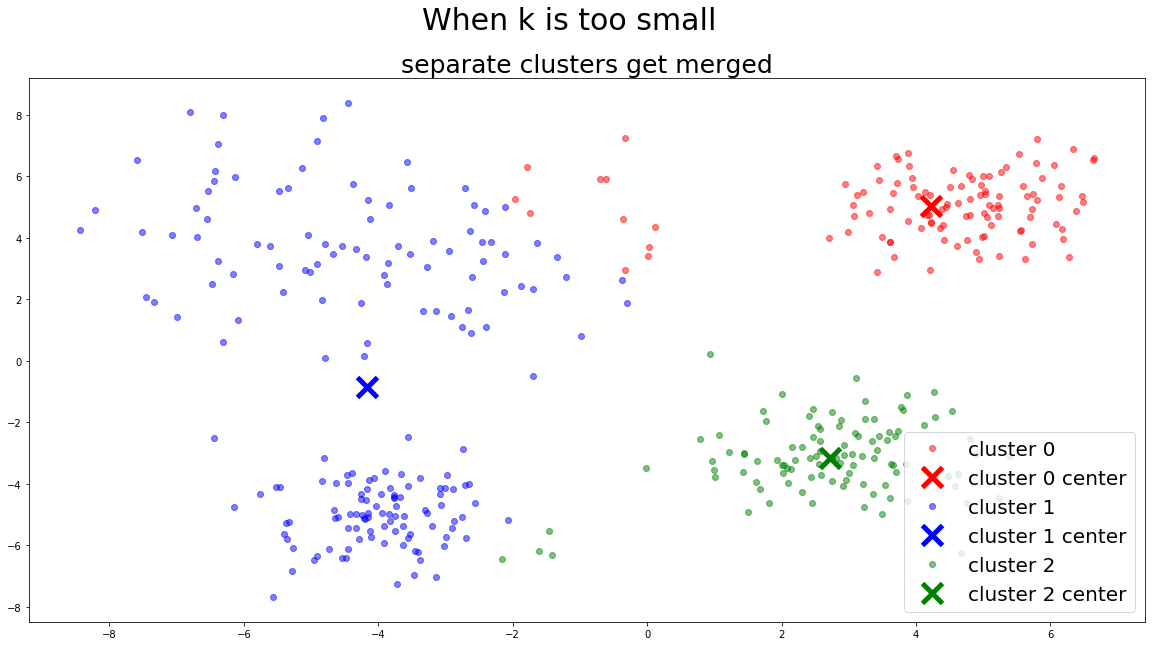

In [23]:
'''Bad choices for the number of clusters:
when k is too small, separate clusters get merged'''

k = 3
clusters, means = k_means(X,k)

'plot dataset + cluster labels'
colors = ['red','blue','green']
plt.figure(figsize=(20,10))
for i in range(k):
    'plot dataset points'
    plt.plot(X[clusters==i,0],X[clusters==i,1],'o',color=colors[i],label = 'cluster '+str(i),alpha=0.5)
    'plot cluster means'
    plt.plot(means[i][0],means[i][1],'x',color = colors[i],markersize=20,markeredgewidth=5, label = 'cluster '+str(i)+' center')
    plt.legend(fontsize=20,loc='lower right')
plt.suptitle('When k is too small',fontsize=30)
plt.title('separate clusters get merged',fontsize=25)

Text(0.5, 1.0, 'some clusters get chopped into multiple pieces')

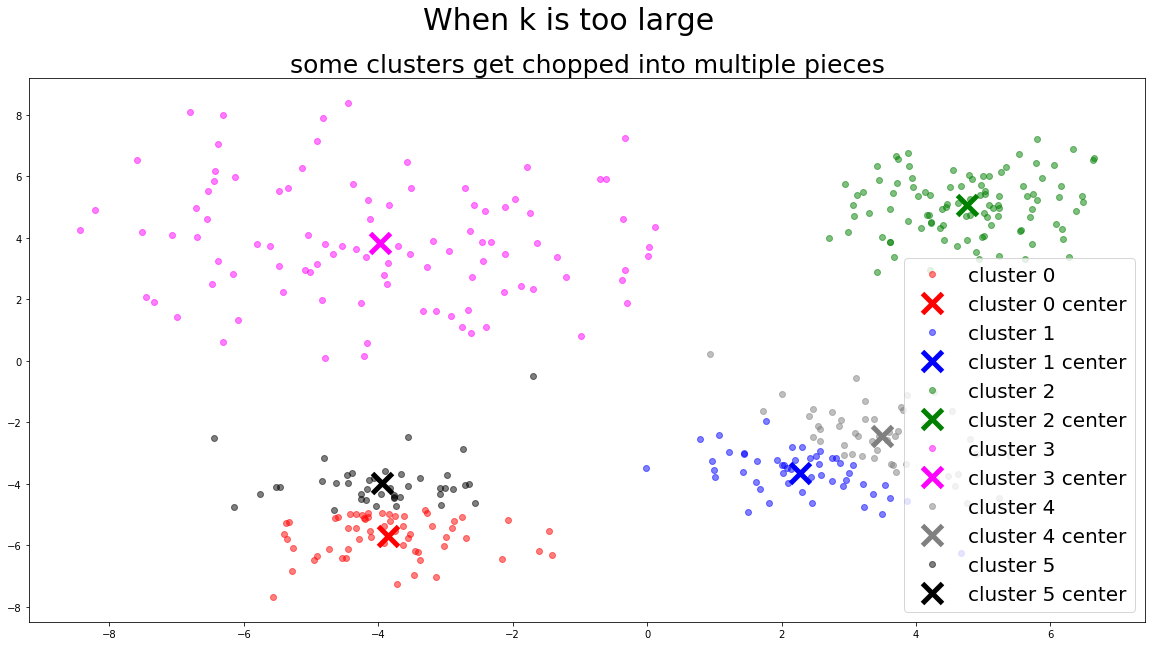

In [26]:
'''Bad choices for the number of clusters:
when k is too large, some clusters get chopped into multiple pieces'''

k = 6
clusters, means = k_means(X,k)

'plot dataset + cluster labels'
colors = ['red','blue','green','magenta','grey','black']
plt.figure(figsize=(20,10))
for i in range(k):
    'plot dataset points'
    plt.plot(X[clusters==i,0],X[clusters==i,1],'o',color=colors[i],label = 'cluster '+str(i),alpha=0.5)
    'plot cluster means'
    plt.plot(means[i][0],means[i][1],'x',color = colors[i],markersize=20,markeredgewidth=5, label = 'cluster '+str(i)+' center')
    plt.legend(fontsize=20,loc='lower right')
plt.suptitle('When k is too large',fontsize=30)
plt.title('some clusters get chopped into multiple pieces',fontsize=25)

One way to choose the number of clusters is to run the k-means algorithm multiple times with different values for k, and keep the best solution.

The most common performance measure for the k-mean algorithm is the inertia (or within-cluster sum-of-squares).
The **inertia** is the mean squared distance between each dataset point and its closest cluster mean.

If we denote by $C_i$ the $i$th cluster and by $m_i$ the center (the mean) of $C_i$, the inertia is given by
$$
\mbox{inertia} = \frac{1}{m}\sum_{i=1}^k \sum_{x\in C_i} \|x-m_i\|_2^2,
$$
where $m$ is the size of the dataset.

In [27]:
def inertia(X,k,clusters,means):
    m = X.shape[0] #dataset size
    inertia = 0
    for i in range(k): # iterate over clusters
        distances = np.square(np.linalg.norm(X[clusters==i]-means[i],axis=1)) # distances from points in cluster i to cluster i mean
        inertia = inertia + np.sum(distances)
    inertia = inertia/m
    return inertia

In [30]:
'run k-means with different values for k'
largest_k = 10
k_list = [k+1 for k in range(largest_k)] # [1,2,3,...,largest_k]

inertia_list = []
for k in k_list:
    clusters, means = k_means(X,k)
    inertia_list.append(inertia(X,k,clusters,means))

When plotting the inertia as a function of the number of clusters $k$, the curve often contains an inflexion point called the *elbow*

Text(0.5, 1.0, 'Inertia')

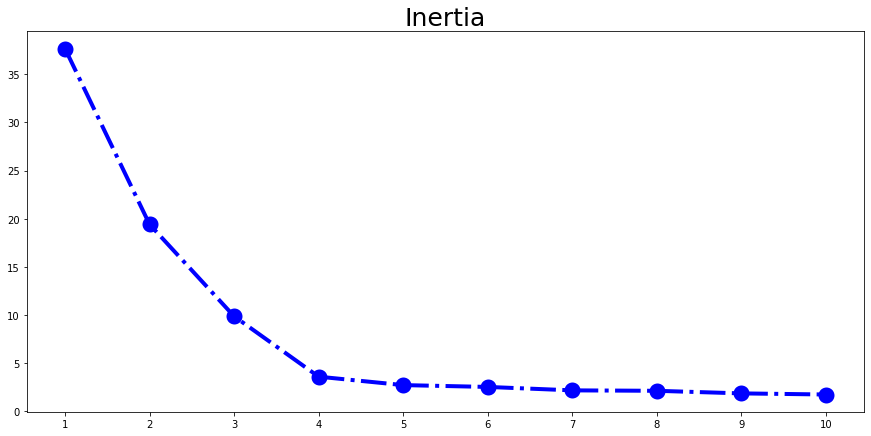

In [31]:
plt.figure(figsize=(15,7))
plt.plot(k_list,inertia_list,'bo-.',markeredgewidth=10,linewidth=4)
plt.xticks(k_list)
plt.title('Inertia',fontsize=25)

As you can see, the inertia drops very quickly as we increase $k$ up to $k=4$, but then it decreases much more slowly as we keep increasing $k$.
This curve has roughly the shape of an arm, and there is an *elbow* at $k=4$.
So, if we did not know better, $k=4$ would be a good choice: any lower value would be dramatic, while any higher value would not help much.

### 10.1.4 Example: The MNIST Dataset

In [584]:
'Obtain the MNist dataset'
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784',version=1)
X = mnist['data'] # we will ignore the labels
X=X[:2000] # we will use only the first 2000 digits

In [594]:
'use the k_means function with k=10 to cluster the dataset'


In [ ]:
'plot the 10 cluster centers as 28x28 images (you should get recognizable digits)'


### 10.1.5 Questions/Problems (some of these problems might appear in Homework 7)

**Problem 1**: Find a two-dimensional dataset on which $k$-means would work poorly.

**Solution:** k-means does not behave very well when the clusters:

  (a) have varying sizes or
 
   (b) nonspherical shapes 

Consider this set of three clusters, of sizes 20, 100, 500

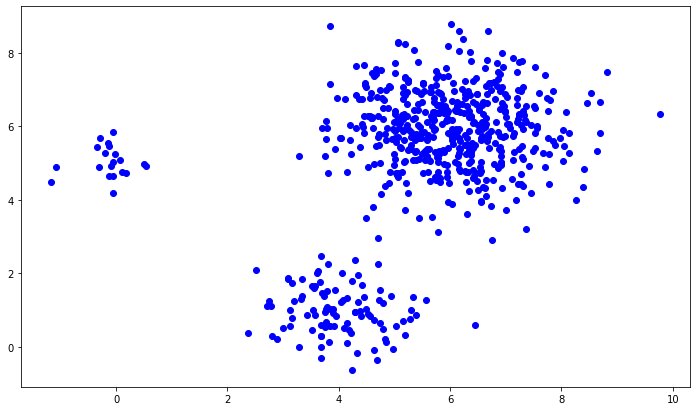

In [188]:
'(a) Unevenly sized clusters'
X = np.zeros((620,2)) 
X[0:500] = np.random.randn(500,2) + [6,6] # blob 1 (big)
X[500:600] = 0.7*np.random.randn(100,2) + [4,1] # blob 2 (medium)
X[600:620] = 0.5*np.random.randn(20,2) + [0,5] # blob 3 (small)

plt.figure(figsize=(12,7))
plt.plot(X[:,0],X[:,1],'bo')

let’s try k-means:

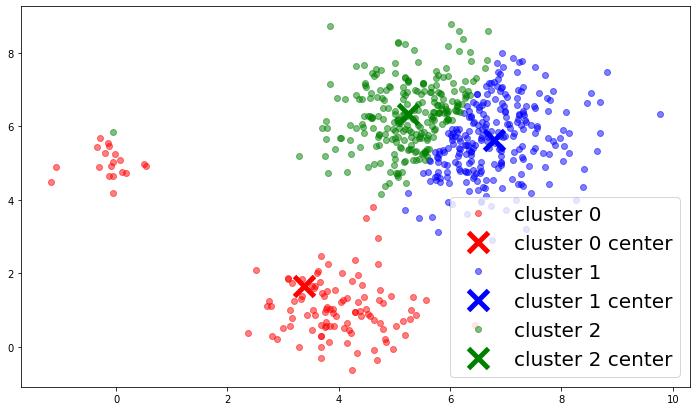

In [189]:
'k-means'
k = 3 # three clusters
clusters, means = k_means(X,k)

'plot dataset + cluster labels'
colors = ['red','blue','green']
plt.figure(figsize=(12,7))
for i in range(k):
    'plot dataset points'
    plt.plot(X[clusters==i,0],X[clusters==i,1],'o',color=colors[i],label = 'cluster '+str(i),alpha=0.5)
    'plot cluster means'
    plt.plot(means[i][0],means[i][1],'x',color = colors[i],markersize=20,markeredgewidth=5, label = 'cluster '+str(i)+' center')
    plt.legend(fontsize=20,loc='lower right')

In its quest to minimize the inertia, the k-means algorithm gives more “weight” to larger clusters. 
In practice, that means it’s happy to let that small cluster end up far away from any center, while it uses those centers to “split up” a much larger cluster.

Consider the following set of two clusters

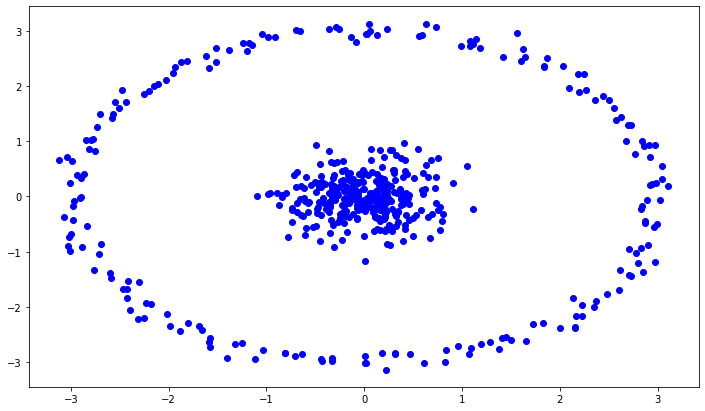

In [64]:
'(b) Non-Spherical Data'
X = np.zeros((500,2))

# cluster 1:
theta = np.linspace(0,2*np.pi,200) 
X[0:200,0] = 3*np.sin(theta)+0.1*np.random.randn(200)
X[0:200,1] = 3*np.cos(theta)+0.1*np.random.randn(200)
# cluster 2:
X[200:500] = 0.4*np.random.randn(300,2)

plt.figure(figsize=(12,7))
plt.plot(X[:,0],X[:,1],'bo')

let’s try k-means:

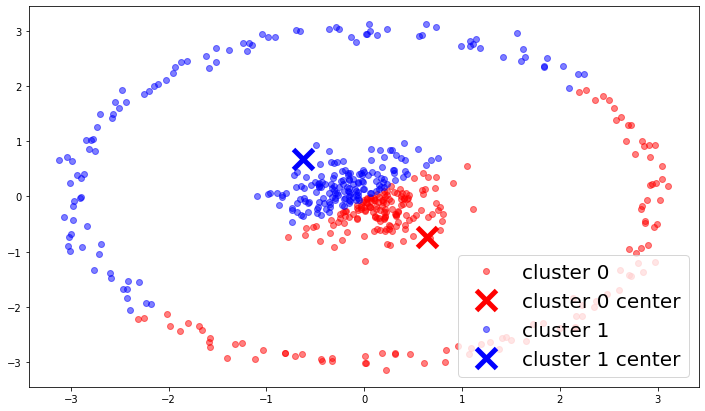

In [65]:
'k-means'
k = 2 # two clusters
clusters, means = k_means(X,k)

'plot dataset + cluster labels'
colors = ['red','blue']
plt.figure(figsize=(12,7))
for i in range(k):
    'plot dataset points'
    plt.plot(X[clusters==i,0],X[clusters==i,1],'o',color=colors[i],label = 'cluster '+str(i),alpha=0.5)
    'plot cluster means'
    plt.plot(means[i][0],means[i][1],'x',color = colors[i],markersize=20,markeredgewidth=5, label = 'cluster '+str(i)+' center')
    plt.legend(fontsize=20,loc='lower right')

The k-means algorithm was not able to cluster the data correctly

Let's see another example of non-spherical clusters.
Consider the following dataset with two (banana-shaped) clusters

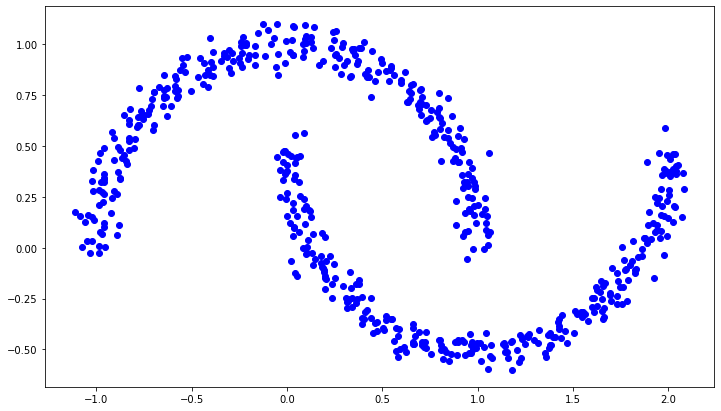

In [66]:
from sklearn.datasets import make_moons
X,labels = make_moons(n_samples=600,noise=0.05)
plt.figure(figsize=(12,7))
colors = ['red','blue']
plt.plot(X[:,0],X[:,1],'o',color='blue')

let’s try k-means:

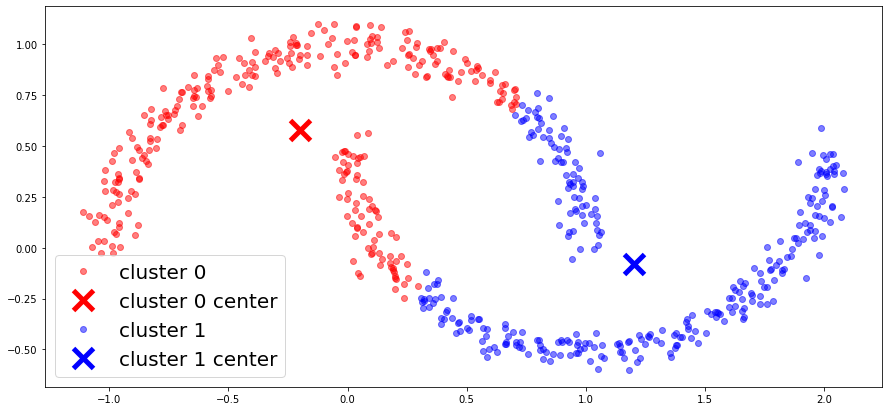

In [67]:
k = 2 # two clusters
clusters, means = k_means(X,k)

plt.figure(figsize=(15,7))
colors = ['red','blue']
for i in range(k):
    'plot dataset points'
    plt.plot(X[clusters==i,0],X[clusters==i,1],'o',color=colors[i],label = 'cluster '+str(i),alpha=0.5)
    'plot cluster means'
    plt.plot(means[i][0],means[i][1],'x',color = colors[i],markersize=20,markeredgewidth=5, label = 'cluster '+str(i)+' center')
    plt.legend(fontsize=20,loc='lower left')

k-means failed to identify the two clusters

**Problem 2:** Consider the following *greedy initialization* of the $k$-means algorithm: pick
the first cluster center at random from the dataset, and then iteratively pick the datapoint that is
furthest from all the previous centers (until $k$ centers are chosen). 

Modify the k_means function so that it uses the greedy initialization (instead of the random initialization)